# Exploratory Data Analysis (EDA)

## Inventory-Records-Sample-Data

### Tasks to do
- Basic Overview: Preparation of a summary of the dataset (columns, types, missing values, basic stats)
- Trends: Top-selling or most stocked items
- Inventory Levels: Low stock/ overstocked
- Categories: Analyzing which categories perform best or worst
- Visualization: Graphs for bar charts, pie charts
- Suggestions: Based on the data, make recommendations for improving inventory efficiency

In [32]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [33]:
df=pd.read_csv(r"E:\General\Inventory-Records-Sample-Data.csv")

In [34]:
df.head(15)

,Product ID,Product Name,Opening \nStock,Purchase/\nStock in,Number of \nUnits Sold,Hand-In-\nStock,Cost Price \nPer Unit (USD),Cost Price\nTotal (USD)
0,P101,Laptop,50,20,10,60,1200,72000
1,P102,Monitor,40,15,5,50,500,25000
2,P103,Keyboard,60,25,15,70,50,3500
3,P104,Headphones,30,10,3,37,100,3700
4,P105,Smartphone,70,30,20,80,900,72000
5,P106,Tablet,45,18,8,55,700,38500
6,P107,Router,55,22,12,65,150,9750
7,P108,External Hard Drive,25,12,5,32,200,6400
8,P109,Wireless Earbuds,35,15,7,43,80,3440
9,P110,Webcam,40,20,10,50,60,3000


### Dataset Summarry analysis

### Trend Analysis

### Trend Analysis

In [35]:
print("Shape of the DataFrame:")
print(df.shape)

print("\nData Types of Each Column:")
print(df.dtypes)

print("\nNon-Null Count:")
print(df.notnull().sum())

print("\nMemory Usage:")
print(df.memory_usage(deep=True))

print("\nBasic Statistics (Including All Columns):")
print(df.describe(include="all"))

print("\nPercentage of Missing Values:")
print((df.isnull().sum() / len(df)) * 100)

Shape of the DataFrame:
(46, 8)

Data Types of Each Column:
Product ID                     object
Product Name                   object
Opening \nStock                 int64
Purchase/\nStock in             int64
Number of \nUnits Sold          int64
Hand-In-\nStock                 int64
Cost Price \nPer Unit (USD)     int64
Cost Price\nTotal (USD)         int64
dtype: object

Non-Null Count:
Product ID                     46
Product Name                   46
Opening \nStock                46
Purchase/\nStock in            46
Number of \nUnits Sold         46
Hand-In-\nStock                46
Cost Price \nPer Unit (USD)    46
Cost Price\nTotal (USD)        46
dtype: int64

Memory Usage:
Index                           132
Product ID                     2438
Product Name                   2783
Opening \nStock                 368
Purchase/\nStock in             368
Number of \nUnits Sold          368
Hand-In-\nStock                 368
Cost Price \nPer Unit (USD)     368
Cost Price\nTotal

In [55]:
Top_sell=df.groupby("Product Name")["Number of \nUnits Sold"].sum()
Top_sell = Top_sell.sort_values(ascending=False).head(10)
Top_sell

Product Name
Smartphone          20
Ethernet Cable      15
Keyboard            15
Router              12
HDD                 12
USB Flash Drive     12
RAM                 11
Laptop              10
Webcam              10
Keyboard Cleaner     9
Name: Number of \nUnits Sold, dtype: int64

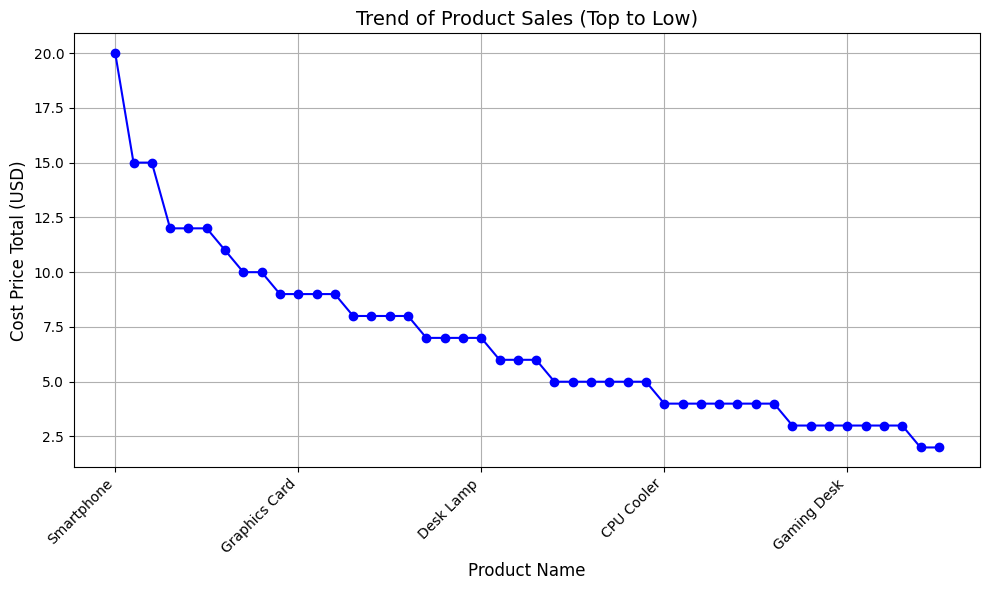

In [43]:
Top_sell.plot(kind='line', figsize=(10, 6), marker='o', linestyle='-', color='b')

plt.title('Trend of Product Sales (Top to Low)', fontsize=14)
plt.xlabel('Product Name', fontsize=12)
plt.ylabel('Cost Price Total (USD)', fontsize=12)

plt.xticks(rotation=45, ha='right')

plt.grid(True)
plt.tight_layout()
plt.show()

In [54]:
Top_stock=df.groupby("Product Name")["Hand-In-\nStock"].sum()
Top_stock = Top_stock.sort_values(ascending=False).head(10)
Top_stock

Product Name
Smartphone         80
Ethernet Cable     75
HDD                73
Keyboard           70
Router             65
USB Flash Drive    63
RAM                61
USB-C Cable        61
Laptop             60
Mouse Pad          58
Name: Hand-In-\nStock, dtype: int64

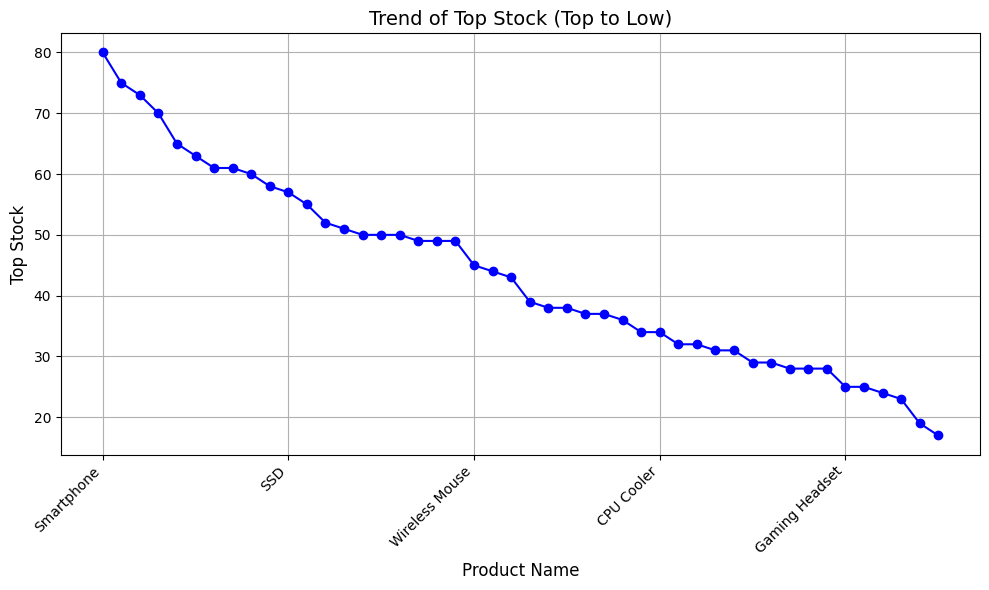

In [39]:
Top_stock.plot(kind='line', figsize=(10, 6), marker='o', linestyle='-', color='b')

plt.title('Trend of Top Stock (Top to Low)', fontsize=14)
plt.xlabel('Product Name', fontsize=12)
plt.ylabel('Top Stock', fontsize=12)

plt.xticks(rotation=45, ha='right')

plt.grid(True)
plt.tight_layout()
plt.show()

### Low Stock Alert

In [53]:
low_stock=df.groupby("Product Name")["Hand-In-\nStock"].sum()
low_stock = low_stock.sort_values(ascending=True).head(10)
low_stock

Product Name
External DVD Drive             17
Gaming Chair                   19
WiFi Adapter                   23
USB-C Adapter                  24
Gaming Headset                 25
Desk Chair                     25
Anti-Glare Screen Protector    28
Gaming Desk                    28
Monitor Stand                  28
Gaming Monitor                 29
Name: Hand-In-\nStock, dtype: int64

### Category Analysis

- Analyzing which categories perform best or worst

In [50]:
df["Revenue"] = df["Number of \nUnits Sold"] * df["Cost Price \nPer Unit (USD)"]
df["Profit"] = df["Revenue"] - df["Cost Price \nPer Unit (USD)"]

best_performing = df.sort_values(by="Revenue", ascending=False).head(10)
worst_performing = df.sort_values(by="Profit", ascending=True).head(10)

In [51]:
best_performing

,Product ID,Product Name,Opening \nStock,Purchase/\nStock in,Number of \nUnits Sold,Hand-In-\nStock,Cost Price \nPer Unit (USD),Cost Price\nTotal (USD),Revenue,Profit
4,P105,Smartphone,70,30,20,80,900,72000,18000,17100
0,P101,Laptop,50,20,10,60,1200,72000,12000,10800
5,P106,Tablet,45,18,8,55,700,38500,5600,4900
21,P122,Graphics Card,40,18,9,49,600,29400,5400,4800
1,P102,Monitor,40,15,5,50,500,25000,2500,2000
22,P123,CPU,30,15,7,38,350,13300,2450,2100
6,P107,Router,55,22,12,65,150,9750,1800,1650
20,P121,Gaming Monitor,25,10,4,29,400,11600,1600,1200
23,P124,Motherboard,25,12,5,32,200,6400,1000,800
7,P108,External Hard Drive,25,12,5,32,200,6400,1000,800


In [52]:
worst_performing

,Product ID,Product Name,Opening \nStock,Purchase/\nStock in,Number of \nUnits Sold,Hand-In-\nStock,Cost Price \nPer Unit (USD),Cost Price\nTotal (USD),Revenue,Profit
36,P137,Printer Cable,25,10,4,29,5,145,20,15
32,P133,Thermal Paste,40,15,5,50,5,250,25,20
40,P141,Anti-Glare Screen Protector,25,8,3,28,10,280,30,20
34,P135,WiFi Adapter,20,8,3,23,20,460,60,40
33,P134,Cable Management Kit,30,12,4,34,15,510,60,45
41,P142,USB-C Adapter,20,10,4,24,15,360,60,45
39,P140,USB Hub,35,12,4,31,15,465,60,45
35,P136,External DVD Drive,15,6,2,17,50,850,100,50
30,P131,Monitor Stand,25,10,3,28,30,840,90,60
44,P145,USB-C Cable,50,20,9,61,8,488,72,64


In [57]:
df.head()

,Product ID,Product Name,Opening \nStock,Purchase/\nStock in,Number of \nUnits Sold,Hand-In-\nStock,Cost Price \nPer Unit (USD),Cost Price\nTotal (USD),Revenue,Profit
0,P101,Laptop,50,20,10,60,1200,72000,12000,10800
1,P102,Monitor,40,15,5,50,500,25000,2500,2000
2,P103,Keyboard,60,25,15,70,50,3500,750,700
3,P104,Headphones,30,10,3,37,100,3700,300,200
4,P105,Smartphone,70,30,20,80,900,72000,18000,17100


## Correlation Heatmap

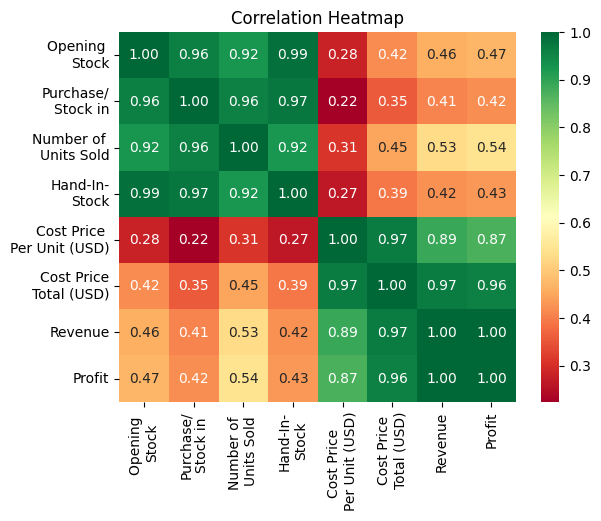

In [59]:
corr = df[[
    "Opening \nStock", "Purchase/\nStock in", "Number of \nUnits Sold",
    "Hand-In-\nStock", "Cost Price \nPer Unit (USD)", "Cost Price\nTotal (USD)",
    "Revenue", "Profit"
]].corr()

sns.heatmap(data=corr, annot=True, cmap="RdYlGn", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()